## Decision trees are generally used for classification problems. But it can also be used for regression problems by grouping the dependent variable (continuous) into buckets. <code>DecisionTreeRegressor()</code> from the scikit-learn library helps us to use decision trees for regression problems. The implementation is similar to <code>DecisionTreeClassifier()</code>.

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>Here MEDV is the continuous dependent variable.

## Build a predictor for MEDV using decision tree algorithm.

## Measure the performance of the model using regression evaluation metrics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,auc
from sklearn import tree



In [ ]:
cols = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","Medv"]


In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/data science/Copy of Housing.csv',lineterminator="\n", header=None, delim_whitespace=True)
dataset.columns = cols

# dataset.to_csv("Final.csv")
# ds = pd.DataFrame(dataset, columns=cols)
dataset.head(505)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9


In [ ]:
'''{'crim': 73.9865781990693, 'zn': 543.9368136813682, 'indus': 47.06444247368215, 'chas': 0.06451297303643408,
 'nox': 0.013427635718115288, 'rm': 0.49367085022110907, 'age': 792.358398505068, 'dis': 4.434015137382069,
  'rad': 75.81636598442452, 'tax': 28404.759488122727, 'ptratio': 4.686989120651195, 'b': 8334.75226292177,
   'lstat': 50.99475950886393} '''


"{'crim': 73.9865781990693, 'zn': 543.9368136813682, 'indus': 47.06444247368215, 'chas': 0.06451297303643408,\n 'nox': 0.013427635718115288, 'rm': 0.49367085022110907, 'age': 792.358398505068, 'dis': 4.434015137382069,\n  'rad': 75.81636598442452, 'tax': 28404.759488122727, 'ptratio': 4.686989120651195, 'b': 8334.75226292177,\n   'lstat': 50.99475950886393} "

In [ ]:
import statistics
statistics.variance(dataset['Medv'])

84.58672359409854

In [ ]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  Medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
dataset.describe().columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'Medv'],
      dtype='object')

In [ ]:
dependent = 'Medv'

In [ ]:
independent = ['crim', 'zn', 'indus',  'nox', 'rm', 'age', 'dis',  'tax',
       'ptratio', 'b', 'lstat','chas','rad']
       
# ind_desc_var = [,]

In [ ]:
x = dataset[independent]
y = dataset[dependent] 
print(y.shape)

(506,)


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, train_size= 0.8, random_state=0)

regrassion_tree = DecisionTreeRegressor( criterion='squared_error', splitter='best',min_samples_split=10)
regrassion_tree.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=10)

In [ ]:
y_pred= regrassion_tree.predict(x_test)

In [ ]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)
print('y_predict : ',y_pred.shape)

x_train :  (404, 13)
x_test :  (102, 13)
y_train :  (404,)
y_test :  (102,)
y_predict :  (102,)


In [ ]:
regrassion_tree.score(x_train,y_train)      

0.9668529462993088

In [ ]:
from sklearn.model_selection import KFold,cross_val_score

kfold_regrassion = KFold(3)
result = cross_val_score(regrassion_tree,x, y, cv=kfold_regrassion) 
print(np.mean(result))

0.4366909435752257


<function matplotlib.pyplot.show>

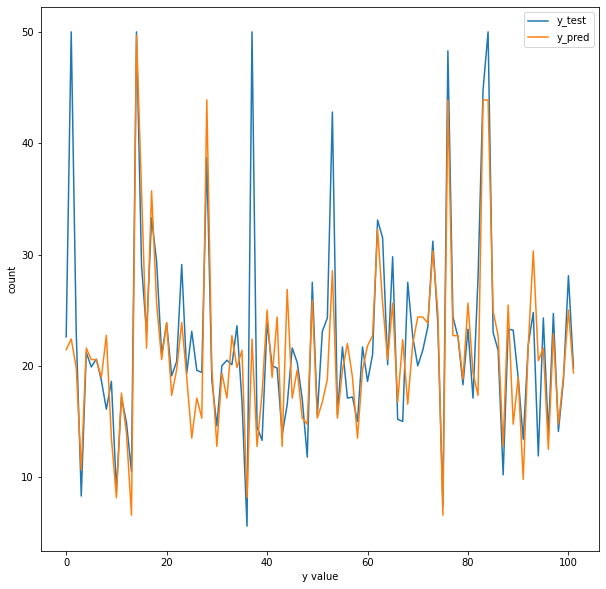

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
plt.plot(np.array(y_test),data='dataset')
plt.plot(np.array(y_pred), data=dataset)
plt.xlabel('y value')
plt.ylabel('count')
plt.legend(['y_test', 'y_pred'])
plt.show

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2score = r2_score(y_test, y_pred)
print(r2score)
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.6249851548412662
30.536873466315544


In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source 

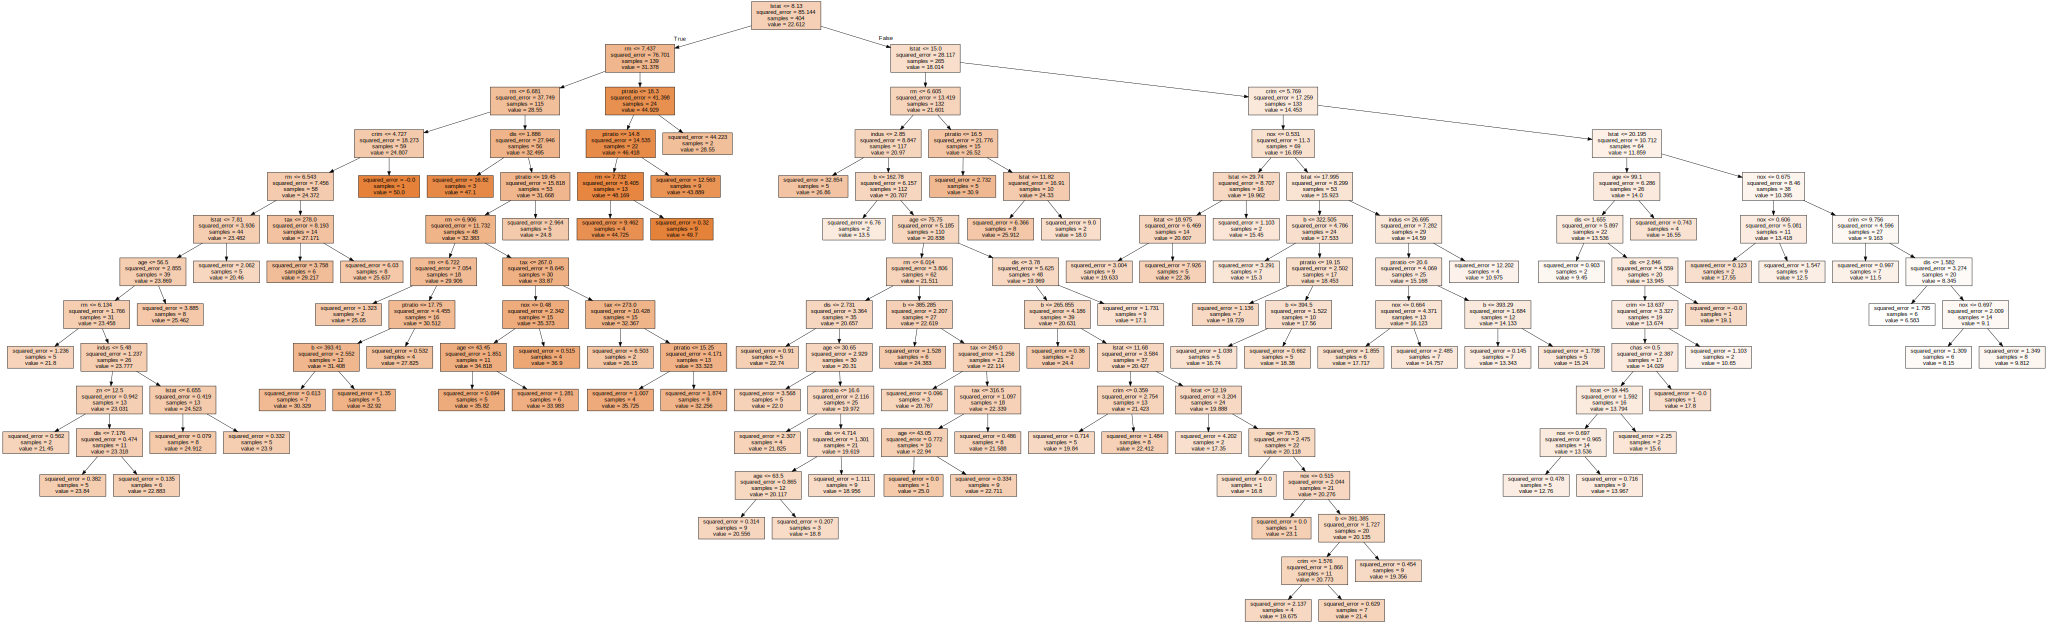

<Figure size 3600x3600 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(50,50))
graph = Source(tree.export_graphviz(regrassion_tree,out_file=None,feature_names=x_train.columns,class_names=[x_train.columns], filled= True))
display(SVG(graph.pipe(format='svg')))